In [1]:
import numpy as np
import pandas as pd
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
np.random.seed(12345)
import matplotlib.pyplot as plt
import matplotlib
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)

# A Brief matplotlib API Primer

Run following statement first to active a interactive plotting system in Jupyter.

%matplotlib notebook

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data = np.arange(10)
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

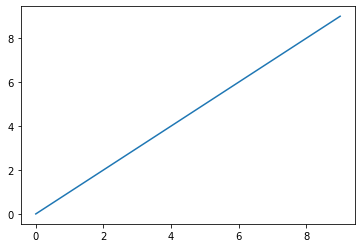

In [4]:
plt.plot(data)

## Figures and Subplots

### Intro

Plots in matplotlib reside within a Figure object.

`plt.figure()` creates a blank figure, but we can't make a plot with a blank figure, we have to create one or more `subplots` using `add_sublpot`.

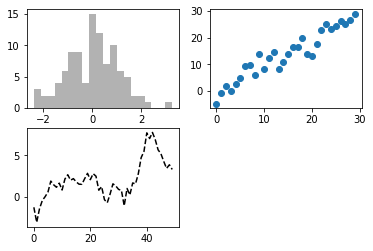

In [5]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))
ax3.plot(np.random.randn(50).cumsum(), 'k--')

fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None) # Adjusting.

### Adjusting the space around subplots

**Eg:**  
`subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)`

`wspace` and `hspace` controls the percentage of the figure width and figure height to use as spacing etween subplots.

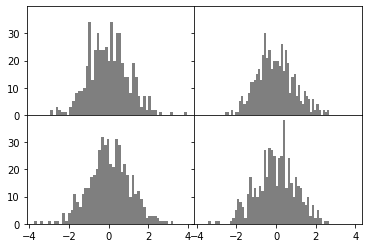

In [6]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

## Colors, Markers,  and Line Styles

Matplotlib's main `plot` function accepts arrays of `x` and `y` and optionally a string abbreviation indicating color and line style.

**Eg:**  
`ax.plot(x, y, 'g--')`  
`ax.plot(x, y, linestyle='--', color='g')`  
*(Two lines of code above are equivalent.)*

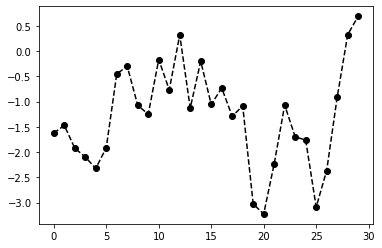

In [7]:
data = np.random.randn(30).cumsum()
plt.plot(data, 'ko--')
# Same as `plt.plot(np.random.randn(30).cumsum(), color='k', linestyle='dashed', marker='o')`

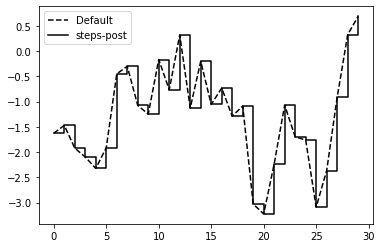

In [8]:
plt.plot(data, 'k--', label='Default')
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best') # Pass label options in plot() then create .legend() object.

## Ticks, Labels, and Legends

We can use either pyplot interface or native matplotlib API to do plot decorations.

**Pyplot Interface**  
Designed for interactive use, consist of methods that an control the plot range, tick locations, tick labels, and so on respectively.
1. Call with no arguments returns the current parameter value.
2. Call with parameters sets the parameter value.

### Setting the title, axis labels, ticks, and ticklabels

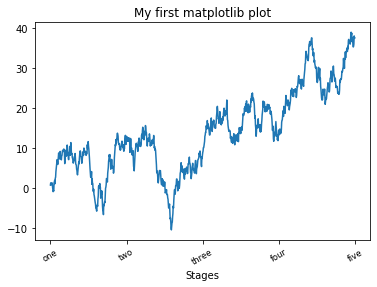

In [9]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                            rotation=30, fontsize='small')

ax.set_title('My first matplotlib plot') # Set title, see also plt.title()
ax.set_xlabel('Stages') # Set xlabel, see also plt.x_label()
ax.plot(np.random.randn(1000).cumsum())

In [10]:
props = {
    'title': 'My first matplotlib plot',
    'xlabel': 'Stages'
}
ax.set(**props) # Batch setting by using ax.set()

[Text(0.5, 1.0, 'My first matplotlib plot'),
 Text(0.5, 17.200000000000003, 'Stages')]

### Adding Legends

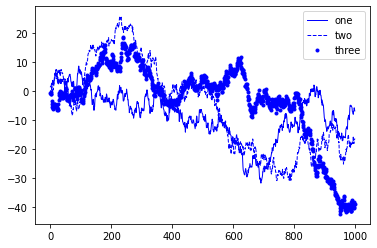

In [11]:
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum(), 'b', linewidth=1,  label='one')
ax.plot(np.random.randn(1000).cumsum(), 'b--', linewidth=1,  label='two')
ax.plot(np.random.randn(1000).cumsum(), 'b.', linewidth=1,  label='three')

ax.legend(loc='best') # Pass option label then call ax.legend() or plt.legend() to create label automatically.

## Annotations and Drawing on a Subplot

Besides the standard plot types, we can also create our own plot annotations, which could consist of text, arrow, or ther shapes. We can add annotations and text using the `text`, `arrow`, and `annotate` functions.

**Eg: Give coordinates $(x, y)$ then create a text on the plot.**  
ax.text(x, y, 'Hello world!', family='monospace', fontsize=10)

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

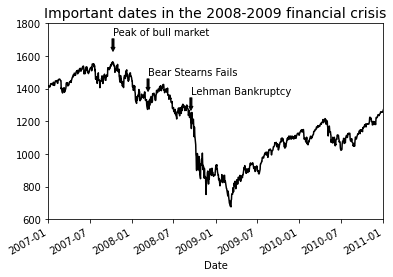

In [12]:
from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

path = r"D:/Projects/PyLearning/Exercise/py_for_data_analysis/examples/spx.csv"
data = pd.read_csv(path, index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, style='k-')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor='black', headwidth=4, width=2, headlength=4),
                horizontalalignment='left', verticalalignment='top')

# Zoom in on 2007-2010, i.e. set limit.
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in the 2008-2009 financial crisis', fontsize=14)

We can also draw shapes like `Rectangle` and `Circle`.

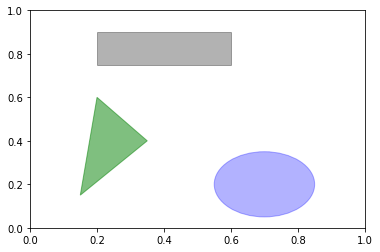

In [13]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],color='g', alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

## Saving Plots to File

**Eg: Save figure as a .svg file.**  
`plt.savefig('figpath.svg')`

As showed above, pyplot will infer the file type from file extension automatically, we can even get a PDF file if we set the extension as .pdf.

**Some frequently used options:**
1. dpi: controls the dot-per-inch resolution.
2. bbox_inches: trim the white space around the actual figure.

For example: `plt.savefig('figpath.png', dpi=400, bbox_inches='tight')`

We can even write to a disk buffer, because `savefig` doesn't have to write to disk, it can also write to any file-like object.

In [14]:
from io import BytesIO
buffer = BytesIO()
plt.savefig(buffer)
plot_data = buffer.getvalue()

<Figure size 432x288 with 0 Axes>

## matplotlib Configuration

We maybe encounter some format problems if we are preparing for publication. In that situation, we can assign a set of global parameters to override the default settings, including figure size, subplot spacing, colors, font size, grid styles, and so on.

For modify the configuration programmatically from Python, we can use `.rc` method.

**Eg1: customize `'figure'` conponent as figsize=(10, 10)**  
`plt.rc('figure', figsize=(10, 10))`

**Eg2: customize by **kwarg**  
```python
font_options = {'family' : 'monospace',
                'weight' : 'bold',
                'size' : 'small'}
plt.rc('font', **font_options)
```

# Plotting with pandas and seaborn

## Line Plots

Use `.plot()` attribute of Series, also need to pass `index` or pass `use_index=False`.

**Pay attention to the optional arguments in the `plot` method.**

<AxesSubplot:title={'center':'TEST'}>

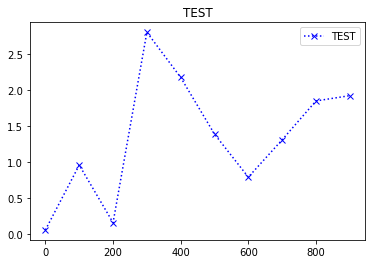

In [46]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 1000, 100))
s.plot(label='TEST', legend=True, title='TEST', style='bx:')

For DataFrame, `plot` method will plot each of its columns as a different line on the same subplot, creating a legend automatically.

**Pay attention to the `ax` option.**

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

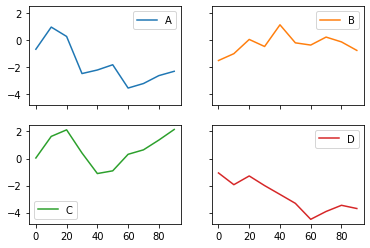

In [56]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)

df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                  columns=['A', 'B', 'C', 'D'],
                  index=np.arange(0, 100, 10))

df.plot(ax=axes, subplots=True)

## Bar Plots

Main method: `plot.bar()` and `plot.barh()`.

**Eg:** Use `s.value_counts().plot.bar()` to count value frequency of a `Series` then show it as a bar chart.

<AxesSubplot:>

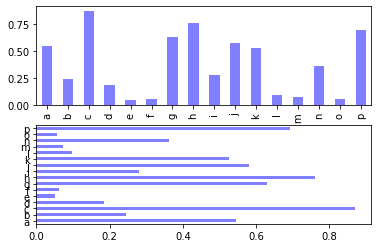

In [59]:
fig, axes = plt.subplots(2, 1)

data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0], color='b', alpha=0.5)
data.plot.barh(ax=axes[1], color='b', alpha=0.5)

For DataFrame, data can be grouped by index.

Note that the name of the index column is used to title the legend.

In [60]:
df = pd.DataFrame(np.random.rand(6, 4),
                  index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df

Genus,A,B,C,D
one,0.923981,0.642565,0.078271,0.680922
two,0.593240,0.731738,0.638858,0.019065
three,0.259462,0.760378,0.622703,0.085161
four,0.162976,0.556786,0.803294,0.825524
five,0.141707,0.305885,0.734722,0.816744
six,0.143923,0.294349,0.145174,0.430758


<AxesSubplot:>

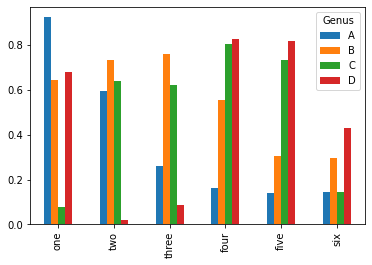

In [61]:
df.plot.bar()

<AxesSubplot:>

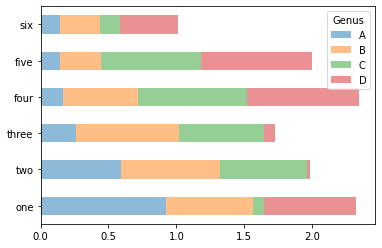

In [62]:
# Create a stacked bar chart.
df.plot.barh(stacked=True, alpha=0.5)

Make a stacked bar plot showing the percentage of data points for each party size on each day.

In [69]:
path = r"D:\Projects\PyLearning\Exercise\py_for_data_analysis\examples\tips.csv"

tips = pd.read_csv(path)
party_counts = pd.crosstab(tips['day'], tips['size'])

# Not many 1- and 6-person parties
party_counts = party_counts.loc[:, 2:5]

# Normalize to sum to 1
party_pcts = party_counts.div(party_counts.sum(1), axis=0)

party_counts

size,2,3,4,5
day,,,,
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3
Thur,48,4,5,1


<AxesSubplot:xlabel='day'>

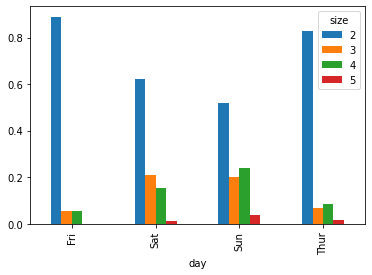

In [70]:
party_pcts.plot.bar()

Use `seaborn` package for data that requires aggregation or summarization before making a plot.

In [72]:
import seaborn as sns

tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


<AxesSubplot:xlabel='tip_pct', ylabel='day'>

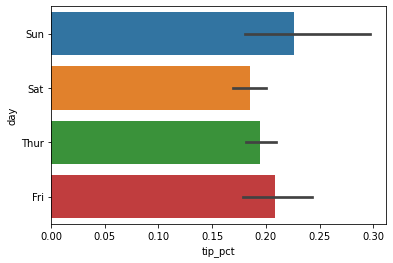

In [73]:
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

Plottingfunctionsinseaborn take a `data` argument, which can be apandas DataFrame. The other arguments refer to column names.